In [61]:
from os import listdir
from os.path import isfile, join
import json
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import numpy as np


<h1> Timeline Visualisation for ExMan study </h1>

In [62]:
mypath = "./data"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

focusSessions = []
focusSessionPerParticipant = {}

for i in onlyfiles:
    with open(f'data/{i}', 'r') as outfile:
        participant = outfile.name[6:8]
        focusSessionPerParticipant[participant] = []

        data = json.load(outfile)
        for focusSession in data['focusSessions']:
            focusSessionLength = (datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3) - datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)).total_seconds() / 60
            focusSession['participant'] = participant
            
            if focusSessionLength > 5 and focusSessionLength < 300:
                focusSessionsCleaned.append(focusSession)
                focusSessions.append(focusSession)
                focusSessionPerParticipant[participant].append(focusSession)

print(len(focusSessionPerParticipant))
print(focusSessionPerParticipant)
print(len(focusSessions))

11
{'06': [{'id': '778ddd97-f0a5-4094-b0d3-9065fdc8d8ea', 'startTime': 1606828985058, 'endTime': 1606829351542, 'originalEndTime': 1606836185058, 'services': [{'id': 'bf78c7b9-3f5d-409a-940b-f398494f6f55', 'name': 'teams', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829075324, 1606829077002], [1606829294112, 1606829298000]]}, {'id': '30c2c284-ab16-4a46-8eb2-b61b0b6f0be6', 'name': 'whatsapp', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829076994, 1606829078367], [1606829122158, 1606829136243], [1606829297993, 1606829343565]]}, {'id': '8b4498aa-7e88-429f-9294-e17a4d7be658', 'name': 'outlook', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829078359, 1606829079755]]}, {'id': 'a1550247-9478-47a4-b68d-1a5a7d1dc9f3', 'name': 'outlook365', 'autoReplied': [], 'messages': [], 'interactions': [[1606829079747, 1606829083517]]}], 'brokenFocus': [[1606829072978, 1606829095184], [1606829121037, 1606829136177], 

In [63]:
print(len(focusSessions))
print(len(focusSessionPerParticipant))

233
11


<h2> Viz 1: Timeline over 2 weeks study duration </h2>

In [64]:
focusStartEndTuplesPerParticipant = []

for participant in focusSessionPerParticipant:
    print(participant)

    focusStartEndTuples = {
        'exman': [],
        'pomodoro': []
    }

    for focusSession in focusSessionPerParticipant[participant]:
        start = datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)
        end = datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3)
        version = focusSession['appVersion']
        focusLength = end - start
        focusStartEndTuples[version].append((start, focusLength))

    focusStartEndTuplesPerParticipant.append(focusStartEndTuples)


06
02
17
16
12
07
09
01
08
11
10


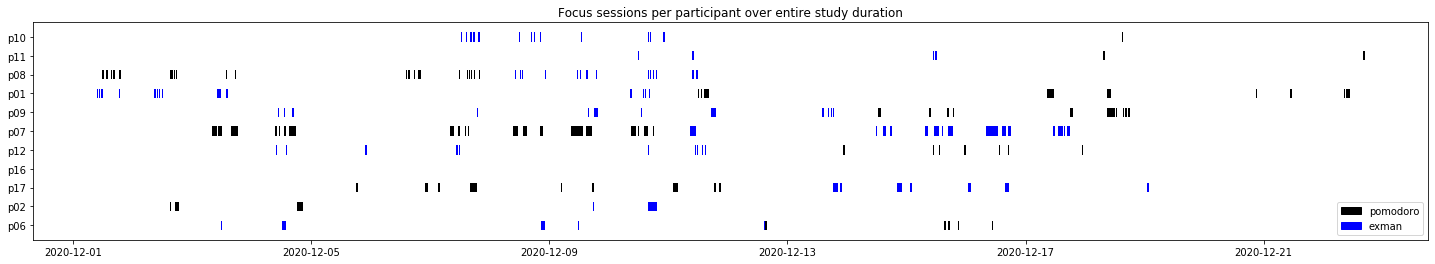

In [65]:
fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(focusSessionPerParticipant))])
gnt.set_yticklabels(['p'+str(i) for i in focusSessionPerParticipant]) 
  
# Declaring multiple bars in at same level and same width 
gnt.broken_barh(focusStartEndTuplesPerParticipant[0]['exman'], (0, 50), facecolors="blue")
gnt.broken_barh(focusStartEndTuplesPerParticipant[0]['pomodoro'], (0, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[1]['exman'], (100, 50), facecolors="blue")
gnt.broken_barh(focusStartEndTuplesPerParticipant[1]['pomodoro'], (100, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[2]['exman'], (200, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[2]['pomodoro'], (200, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[3]['exman'], (300, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[3]['pomodoro'], (300, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[4]['exman'], (400, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[4]['pomodoro'], (400, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[5]['exman'], (500, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[5]['pomodoro'], (500, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[6]['exman'], (600, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[6]['pomodoro'], (600, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[7]['exman'], (700, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[7]['pomodoro'], (700, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[8]['exman'], (800, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[8]['pomodoro'], (800, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[9]['exman'], (900, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[9]['pomodoro'], (900, 50), facecolors="black")

gnt.broken_barh(focusStartEndTuplesPerParticipant[10]['exman'], (1000, 50), facecolors="blue") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[10]['pomodoro'], (1000, 50), facecolors="black")

fig.set_figwidth(25)

black_patch = mpatches.Patch(color='black', label='pomodoro')
blue_patch = mpatches.Patch(color='blue', label='exman')

plt.legend(handles=[black_patch, blue_patch], loc='lower right')
plt.title("Focus sessions per participant over entire study duration")

plt.savefig('sessions_per_participant.pdf')

<h2> Viz 2: Timeline for each focus session </h2>

In [66]:
focusStartEndTuples = []

for focusSession in focusSessions:
    start = datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)
    end = datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3)
    focusLength = end - start

    brokenFocusList = []
    notifications = []

    for brokenFocus in focusSession['brokenFocus']:
        if len(brokenFocus) == 2:
            brokenFocusStart = datetime.datetime.fromtimestamp(brokenFocus[0] / 1e3)
            brokenFocusEnd = datetime.datetime.fromtimestamp(brokenFocus[1] / 1e3)
            brokenFocusDuration = (brokenFocusEnd - brokenFocusStart).total_seconds() / 60
            
            brokenFocusList.append(((brokenFocusStart - start).total_seconds() / 60, brokenFocusDuration))

    for service in focusSession['services']:
        for notification in service['messages']:
            notificationTime = datetime.datetime.fromtimestamp(notification['timestamp'] / 1e3)
            notifications.append((notificationTime - start).total_seconds() / 60)

    focusStartEndTuples.append({
        'participant': focusSession['participant'],
        'focus': [(0, focusLength.total_seconds() / 60)],
        'brokenFocus': brokenFocusList,
        'notifications': notifications,
        'version': focusSession['appVersion']
    })

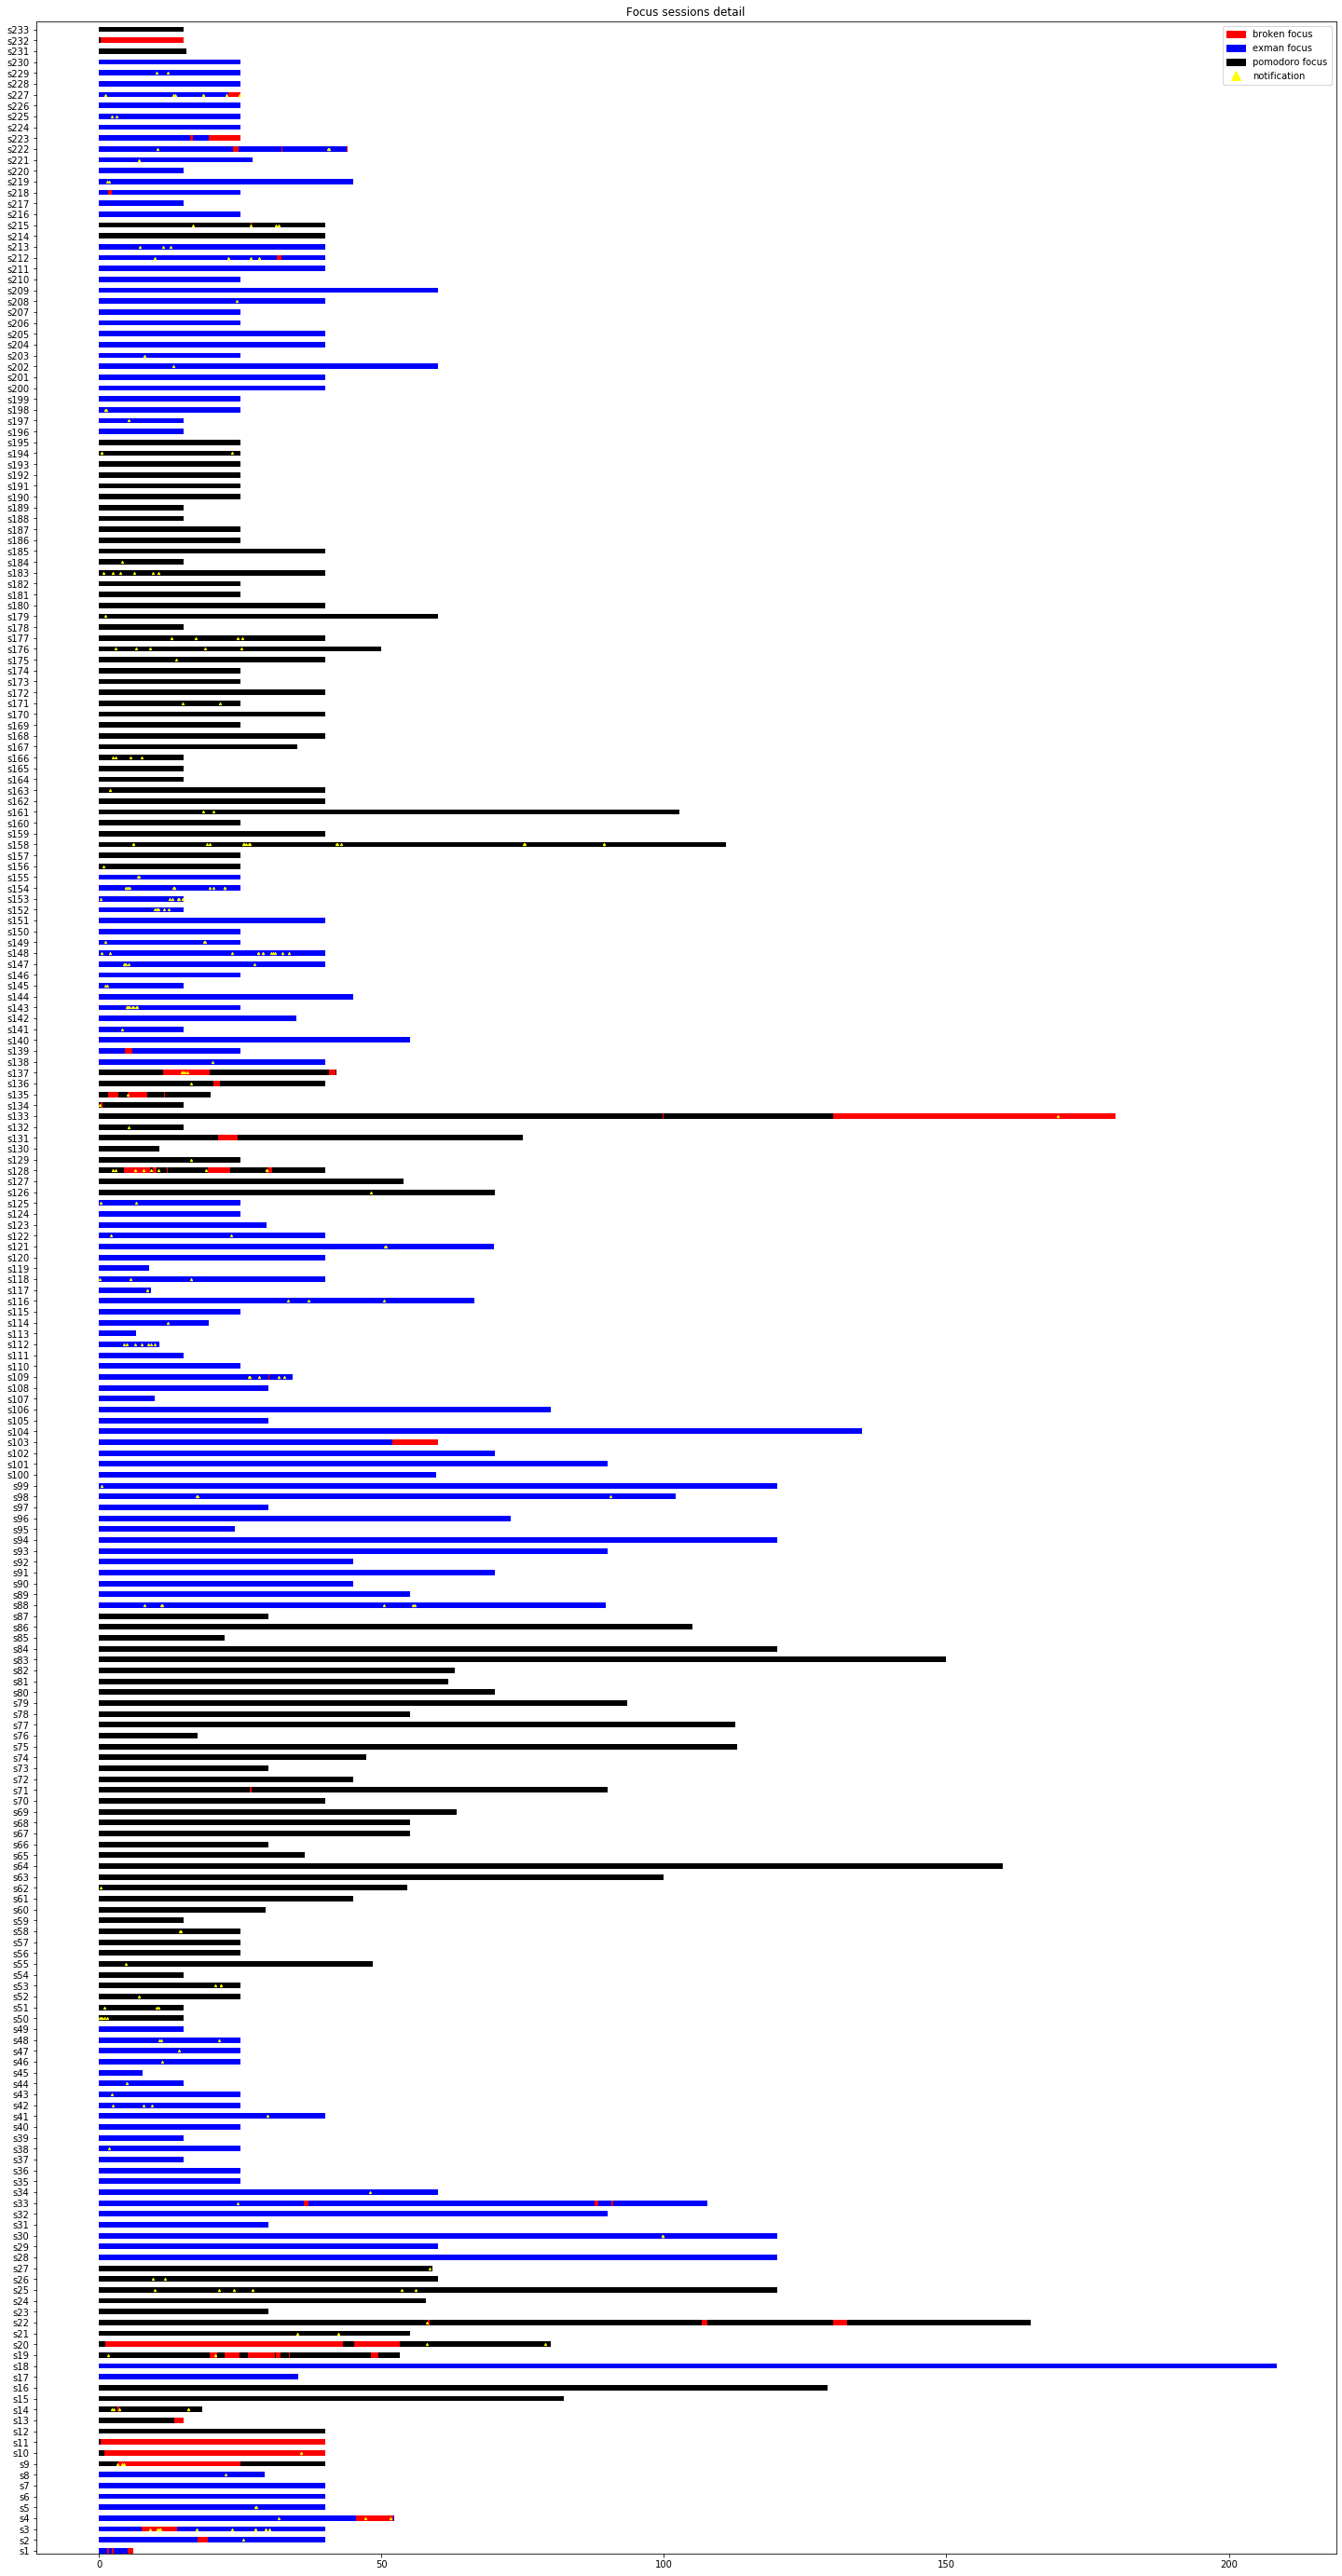

In [67]:
fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(focusStartEndTuples))])
gnt.set_ylim((0,len(focusStartEndTuples) * 100))
gnt.set_yticklabels(['s'+str(i+1) for i in range(len(focusStartEndTuples))]) 

# Declaring multiple bars in at same level and same width 
for i, focusSession in enumerate(focusStartEndTuples, start=0):
    if focusSession['version'] == 'exman':
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="blue")
    else:
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="black")

    gnt.broken_barh(focusSession['brokenFocus'], (i*100, 50), facecolors="red")
    notifications = focusSession['notifications']
    gnt.scatter(notifications, np.full_like(notifications,(i+0.25)*100), marker="^", s=5, color="yellow")

fig.set_figwidth(25)
fig.set_figheight(50)

plt.title("Focus sessions detail")
black_patch = mpatches.Patch(color='black', label='pomodoro focus')
blue_patch = mpatches.Patch(color='blue', label='exman focus')
red_patch = mpatches.Patch(color='red', label='broken focus')
notification_marker = mlines.Line2D([], [], color='yellow', marker='^', linestyle='None',
                          markersize=10, label='notification')

plt.legend(handles=[red_patch, blue_patch, black_patch, notification_marker], loc='top right')

plt.savefig('session_details.pdf')

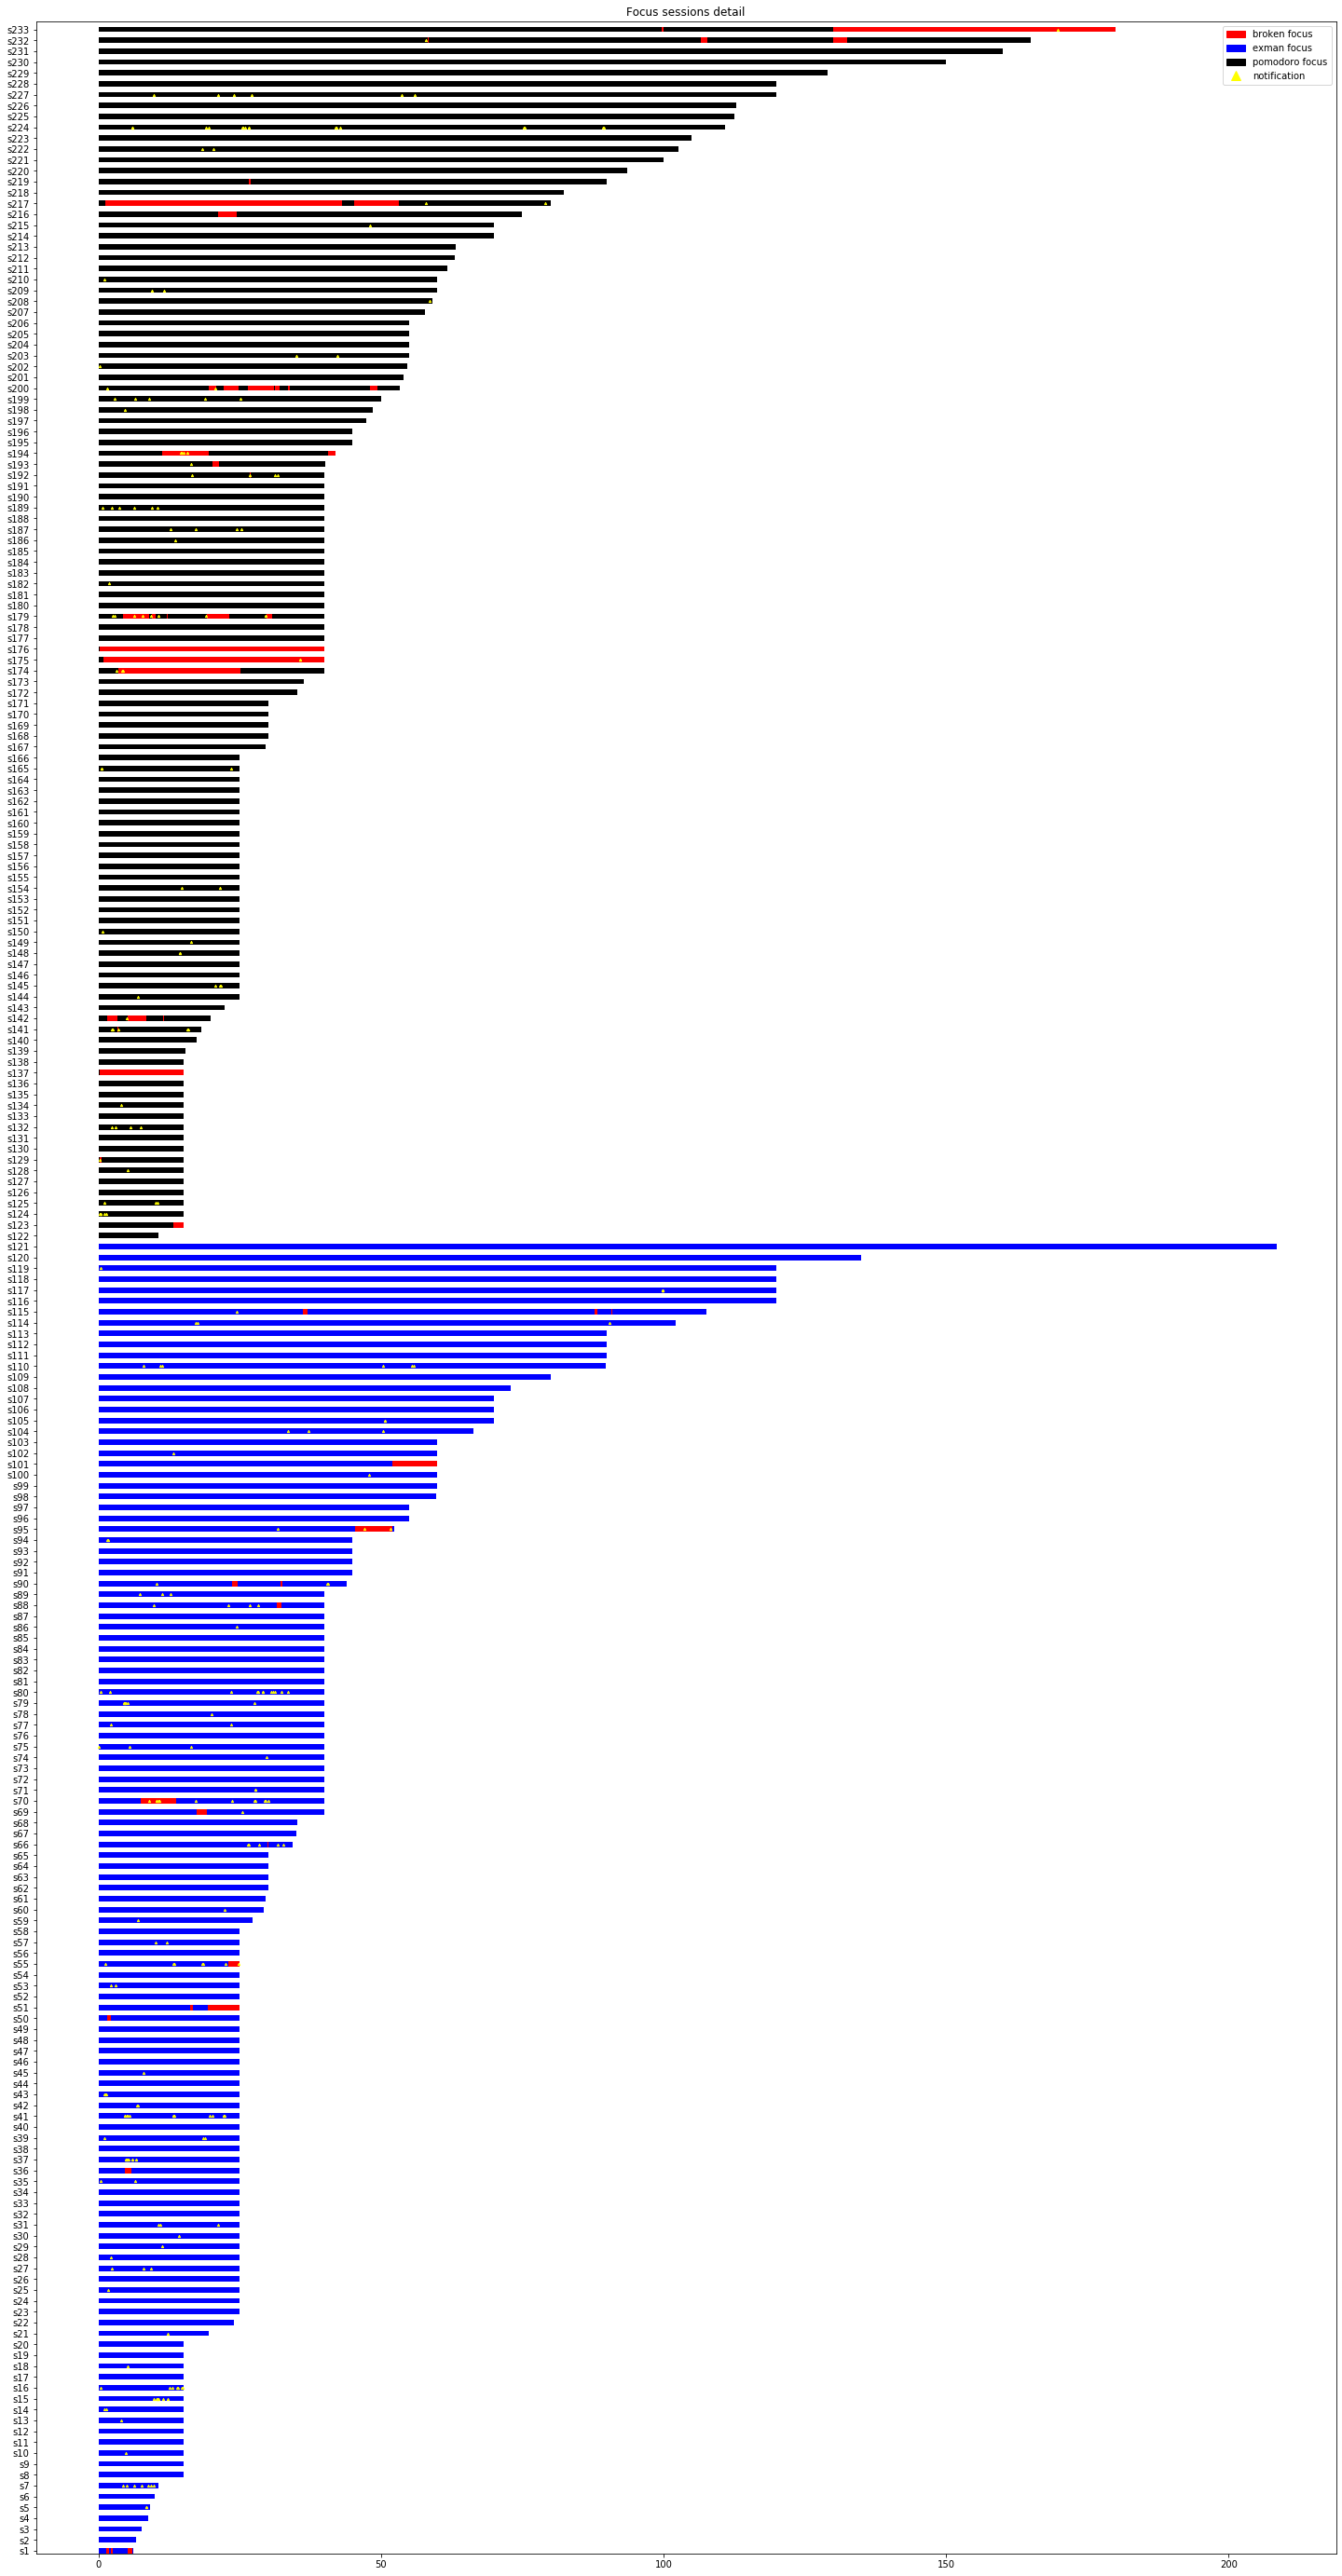

In [77]:
sortedByVersionAndLength = sorted(focusStartEndTuples, key=lambda k: (k['version'], k['focus'][0][1]))

fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(sortedByVersionAndLength))])
gnt.set_ylim((0,len(sortedByVersionAndLength) * 100))
gnt.set_yticklabels(['s'+str(i+1) for i in range(len(sortedByVersionAndLength))]) 

# Declaring multiple bars in at same level and same width 
for i, focusSession in enumerate(sortedByVersionAndLength, start=0):
    if focusSession['version'] == 'exman':
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="blue")
    else:
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="black")

    gnt.broken_barh(focusSession['brokenFocus'], (i*100, 50), facecolors="red")
    notifications = focusSession['notifications']
    gnt.scatter(notifications, np.full_like(notifications,(i+0.25)*100), marker="^", s=5, color="yellow")

fig.set_figwidth(25)
fig.set_figheight(50)

plt.title("Focus sessions detail")
black_patch = mpatches.Patch(color='black', label='pomodoro focus')
blue_patch = mpatches.Patch(color='blue', label='exman focus')
red_patch = mpatches.Patch(color='red', label='broken focus')
notification_marker = mlines.Line2D([], [], color='yellow', marker='^', linestyle='None',
                          markersize=10, label='notification')

plt.legend(handles=[red_patch, blue_patch, black_patch, notification_marker], loc='top right')

plt.savefig('session_details_sorted_by_version_and_length.pdf')

